In [22]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
gene_info = pd.read_table('geneinfo_beta.txt')
sig_info = pd.read_table('siginfo_beta.txt', low_memory=False)

In [5]:
fil = gene_info['feature_space']=='landmark'
genes_lm = gene_info[fil]
genes_lm = genes_lm.set_index('gene_id', drop = True)['gene_symbol']
genes_lm.index = genes_lm.index.astype(str)


In [6]:
def map_gene_id_to_gene_symbol(genes_lm,signatures_lm):
    genes = genes_lm.copy()
    signatures = signatures_lm.copy()
    # map gene names of CRISPR signatures
    genes.index = genes.index.astype('int')
    signatures.index = signatures.index.map(genes.to_dict())
    return signatures

In [10]:
signatures_lm_xpr = pd.read_csv('signatures_lm_xpr.csv', index_col = 0)
signatures_lm_xpr_mapped = map_gene_id_to_gene_symbol(genes_lm, signatures_lm_xpr)

In [24]:
signatures_lm = pd.read_csv('signatures_lm_oe.csv', index_col = 0)
signatures_lm_oe_mapped = map_gene_id_to_gene_symbol(genes_lm, signatures_lm)

In [19]:
def calculate_enzyme_correlation(enzyme, signatures):
    genes = list(signatures.columns)
    genes.remove(enzyme)
    correlation = pd.DataFrame(index =  genes, columns = ['spearmanr', 'rank'])
    for gene in genes:
        correlation.loc[gene, 'spearmanr'] = spearmanr(signatures[gene], signatures[enzyme])[0]
    correlation = correlation.sort_values(by='spearmanr')
    correlation['rank'] = np.arange(len(correlation))+1
    
    return correlation

In [20]:
def plot_correlation(correlation, pert_type):
    plt.scatter(correlation['rank'], correlation['spearmanr'])
    plt.ylabel('Similarity to '+enzyme, fontsize = 14)
    plt.xlabel('Ranked list of '+pert_type+' signatures', fontsize = 14)
    plt.show()

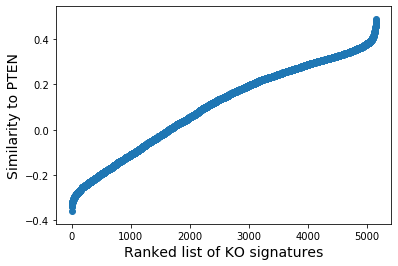

In [31]:
corr_xpr_pten = calculate_enzyme_correlation('PTEN', signatures_lm_xpr_mapped)
plot_correlation(corr_xpr_pten, 'KO')

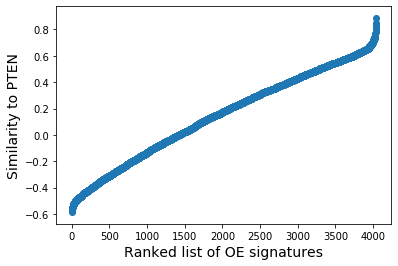

In [30]:
corr_oe_pten = calculate_enzyme_correlation('PTEN', signatures_lm_oe_mapped)
plot_correlation(corr_oe_pten, 'OE')


In [37]:
corr_xpr_pten.tail(30).index

Index(['PROX1', 'TXNRD1', 'PTPN14', 'IFNA8', 'ZWINT', 'OSBPL6', 'MAPK9',
       'CRHBP', 'NUTM2A', 'PTPRJ', 'KMT2C', 'ILDR2', 'IZUMO4', 'JMJD8',
       'NINJ1', 'SERPINB5', 'GSK3B', 'TBC1D7', 'XCR1', 'PRKAB1', 'KDM1B',
       'PTPN12', 'HPS1', 'METTL1', 'RELL1', 'PDE11A', 'ITGA2', 'CISH', 'PRMT2',
       'PUM3'],
      dtype='object')

In [38]:
corr_oe_pten.tail(30).index

Index(['NFKBIB', 'NDUFA13', 'FBXL12', 'MAPK1', 'PSENEN', 'CSK', 'IGFBP5',
       'ATG3', 'MRPS16', 'CDKN1B', 'RASA1', 'DVL1', 'CCDC90A', 'HRSP12',
       'TRAP1', 'E2F8', 'NPDC1', 'UGCG', 'LIG1', 'ZNF597', 'GSK3B', 'CGREF1',
       'ERG', 'RHOA', 'PTPN12', 'FAM173B', 'SERPINB5', 'ACAT2', 'CASP8',
       'PIK3R3'],
      dtype='object')

In [44]:
np.intersect1d(corr_xpr_pten.tail(500).index, corr_oe_pten.tail(500).index)

array(['CSK', 'DHRS3', 'DUSP6', 'DVL1', 'EBF1', 'GPR146', 'GSK3B',
       'HLA-DPB1', 'HSD17B10', 'IFNGR1', 'IGFBP4', 'IL1R1', 'LCN2', 'LSR',
       'MAPK8', 'MATK', 'MDM2', 'NDUFA7', 'NDUFB8', 'PDLIM4', 'PLK1',
       'PRMT2', 'PTPN12', 'SERPINB5', 'SNX17', 'STK25', 'TAP1', 'TWF2',
       'VRK1'], dtype=object)

In [45]:
corr_xpr_pten.loc[['CSK', 'DHRS3', 'DUSP6', 'DVL1', 'EBF1', 'GPR146', 'GSK3B',
       'HLA-DPB1', 'HSD17B10', 'IFNGR1', 'IGFBP4', 'IL1R1', 'LCN2', 'LSR',
       'MAPK8', 'MATK', 'MDM2', 'NDUFA7', 'NDUFB8', 'PDLIM4', 'PLK1',
       'PRMT2', 'PTPN12', 'SERPINB5', 'SNX17', 'STK25', 'TAP1', 'TWF2',
       'VRK1']]

,spearmanr,rank
CSK,0.363623,4904
DHRS3,0.355686,4828
DUSP6,0.365927,4922
DVL1,0.338679,4660
EBF1,0.363003,4895
GPR146,0.361923,4883
GSK3B,0.43928,5143
HLA-DPB1,0.391508,5057
HSD17B10,0.347518,4753
IFNGR1,0.387568,5047


In [42]:
corr_oe_pten.loc['GSK3B']

spearmanr    0.765364
rank             4030
Name: GSK3B, dtype: object